<a href="https://colab.research.google.com/github/navy510616/DX-Motor/blob/main/UNIST_DX_Statisics_%26_AI_toolkits_%EA%B3%BC%EC%A0%9C_(9_8%EC%9D%BC%2C_%EA%B9%80%EC%A7%80%EC%88%98_%EA%B5%90%EC%88%98%EB%8B%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNIST DX - Statistics & AI toolkits 과제 (9/8일, 김지수 교수님)**

# **"Attendance"라는 이름으로 학생의 ID, 수업의 날짜, Zoom에 머무른 시간(분단위)을 칼럼으로 가지는 새로운 pandas DataFrame을 만드시오.**

In [389]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

(a)-2 학생별 온라인 접속 시간(수업 시간) 계산

In [392]:
#### 깃허브에서 데이터 불러오기
df = pd.read_csv('https://github.com/navy510616/DX-Motor/raw/main/class.csv')

#### 데이터 변환 (Csv파일의 날짜데이터는 문자열이라서 접속시간 계산을 위해 datetime으로 변환)
id = []
date = []
J_time = []
L_time = []
for i in range(len(df)):
  ID = df['userID'][i][4:]
  id.append(int(ID))
  JT = df['Join Time'][i]
  date.append(JT[:10])
  jt = datetime.datetime.strptime(JT, '%Y-%m-%d %H:%M')
  J_time.append(jt)
  LT = df['Leave Time'][i]
  lt = datetime.datetime.strptime(LT, '%Y-%m-%d %H:%M')
  L_time.append(lt)

#### 총 머무른 시간 계산
df['ID']=id
df['date']=date
df['J_time']=J_time    
df['L_time']=L_time
df1 = df.drop(['userID','Join Time','Leave Time'], axis=1) #불필요 데이터 삭제

begin_h = 16             #수업 시작시간 16:00pm (H)
end_h = 17               #수업 종료시간 17:15pm (H)
end_m = 15               #수업 종료시간 17:15pm (M)
ontime = []
for i in range(len(df1)):
  a = df['J_time'][i]
  b = (a.hour-begin_h)*3600 + a.minute*60 + a.second
  c = df['L_time'][i]
  d = (c.hour-begin_h)*3600 + c.minute*60 + c.second

  if b <= 0:
    b = 0
  elif b >= (end_h*3600+end_m*60):
    b = (end_h*3600+end_m*60)

  if d <= 0:
    d = 0
  elif d >= ((end_h*3600+end_m*60)-(begin_h*3600)):
    d = ((end_h*3600+end_m*60)-(begin_h*3600))

  on = (d - b)/60
  if on < 0:
    on = 0
  ontime.append(int(on))

df1['ontime'] = ontime
df2 = df1.drop(['J_time','L_time'],axis=1)   #계산 완료 후 컬럼 삭제
df2

,ID,date,ontime
0,54,2020-09-08,0
1,54,2020-09-08,0
2,52,2020-09-08,75
3,54,2020-09-08,0
4,54,2020-09-08,0
...,...,...,...
470,22,2020-10-13,71
471,10,2020-10-13,70
472,46,2020-10-13,67
473,7,2020-10-13,67


(a)-1 학생마다 한줄의 날짜로 데이터 합치기
(a)-3 결석한 날은 접속시간을 0분으로 기록

In [399]:
#### 시작날부터 끝나는날까지 주말 제외한 날짜 계산
#### 전체 일정의 DataFrame을 만들어서 기존 DataFrame과 합치기
#### 중복 데이터 합기기
start_date = '2020-09-08'
end_date = '2020-10-13'
dates = pd.date_range(start_date, end_date, freq='B')
dates_list = dates.strftime("%Y-%m-%d").tolist()
 
userid = 60          # userID 수
list_id = []
list_date =[]

for ud in range(1, userid+1):
  for dl in range(len(dates_list)):
    list_id.append(ud)
    w = dates_list[dl]
    list_date.append(w)
    dl += 1
  ud += 1

dt_list = pd.DataFrame({'ID':list_id, 'date':list_date, 'ontime': 0}) #별도 DataFrame
df3 = df2.append(dt_list,ignore_index=True)                           #기존 DataFrame과 합치기
df4 = df3.groupby(['ID','date'],as_index=False).sum()                 #중복날짜 합치기
Attendance = df4
Attendance.rename(columns={'ID':'학생ID','date' :'수업날짜','ontime':'Zoom접속시간' }, inplace=True)
Attendance

,학생ID,수업날짜,Zoom접속시간
0,1,2020-09-08,75
1,1,2020-09-09,0
2,1,2020-09-10,0
3,1,2020-09-11,0
4,1,2020-09-14,0
...,...,...,...
1555,60,2020-10-07,0
1556,60,2020-10-08,0
1557,60,2020-10-09,0
1558,60,2020-10-12,0


# **(b) "Attendance"에 하나의 칼럼을 추가하시오. 본 칼럼은 학생의 총 머무른 시간이 0분이면 "Absent", 0보다 크고 60분 보다 적으면 "Late/Left early", 60분 이상이면 "Present"라는 값을 가지는 칼럼입니다.**

In [400]:
present = []

for ab in range(len(Attendance)):
  p = Attendance['Zoom접속시간'][ab]
  if p == 0:
    pr = 'Absent'
  elif 0 < p < 60:
    pr = 'Late/Left early'
  elif 60 <= p:
    pr = 'Present'
    
  present.append(pr)

Attendance['present'] = present
Attendance

,학생ID,수업날짜,Zoom접속시간,present
0,1,2020-09-08,75,Present
1,1,2020-09-09,0,Absent
2,1,2020-09-10,0,Absent
3,1,2020-09-11,0,Absent
4,1,2020-09-14,0,Absent
...,...,...,...,...
1555,60,2020-10-07,0,Absent
1556,60,2020-10-08,0,Absent
1557,60,2020-10-09,0,Absent
1558,60,2020-10-12,0,Absent


# **(c) 각 날짜 별로 출석(Present)한 학생과 "Late/Left early"인 학생의 비율을 계산하시오.**

In [402]:
#### Present, Late/Left early를 count하고 학생수로 비율 계산
df = Attendance
df.rename(columns={'학생ID':'ID','수업날짜' :'date','Zoom접속시간':'ontime'}, inplace=True)
df = df[~df['present'].str.contains('Absent', na=False)]
df = df.groupby(['date', 'present']).count()
df = df.drop(['ontime'], axis=1)

ID_count = 60  #학생수
df['%'] = round(((df5['ID']/ID_count) *100), 1)
df

ID     %
date       present                  
2020-09-08 Late/Left early   2   3.3
           Present          35  58.3
2020-09-10 Late/Left early   1   1.7
           Present          36  60.0
2020-09-15 Late/Left early   2   3.3
           Present          35  58.3
2020-09-17 Late/Left early   1   1.7
           Present          36  60.0
2020-09-22 Late/Left early   2   3.3
           Present          37  61.7
2020-09-24 Late/Left early   1   1.7
           Present          38  63.3
2020-09-29 Late/Left early   2   3.3
           Present          30  50.0
2020-10-06 Late/Left early   2   3.3
           Present          41  68.3
2020-10-08 Late/Left early   4   6.7
           Present          35  58.3
2020-10-13 Present          39  65.0

# **(d) 각 학생마다 결석한 횟수를 계산하고 countplot을 그리시오.**

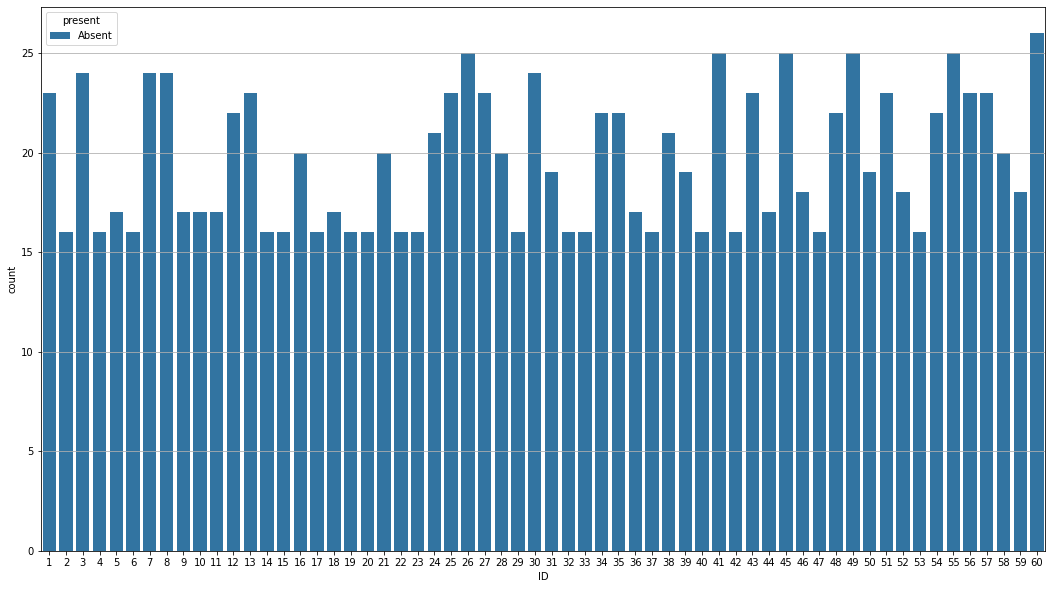

In [406]:
#### Present, Late/Left early 삭제하고 countplot 그리기

df1=Attendance
del1 = df1[df1['present'] == 'Present'].index
del2 = df1[df1['present'] == 'Late/Left early'].index
df1 = df1.drop(del1)
df1 = df1.drop(del2)
df_count = df1.drop(['ontime'], axis=1)
sns.countplot(data=df_count,x='ID',hue='present')
plt.rcParams["figure.figsize"] = (18,10)           #그래프 사이즈 조정
plt.show()

# **(e) "Attendance" 데이터에 대한 EDA를 진행하시오.**

In [410]:
Attendance.head()

,ID,date,ontime,present
0,1,2020-09-08,75,Present
1,1,2020-09-09,0,Absent
2,1,2020-09-10,0,Absent
3,1,2020-09-11,0,Absent
4,1,2020-09-14,0,Absent


In [409]:
Attendance.tail()

,ID,date,ontime,present
1555,60,2020-10-07,0,Absent
1556,60,2020-10-08,0,Absent
1557,60,2020-10-09,0,Absent
1558,60,2020-10-12,0,Absent
1559,60,2020-10-13,0,Absent


In [411]:
len(Attendance)

1560

In [412]:
Attendance.shape

(1560, 4)

In [413]:
Attendance.columns

Index(['ID', 'date', 'ontime', 'present'], dtype='object')

In [414]:
Attendance.describe()

,ID,ontime
count,1560.000000,1560.000000
mean,30.500000,17.607692
std,17.323656,31.451847
min,1.000000,0.000000
25%,15.750000,0.000000
50%,30.500000,0.000000
75%,45.250000,0.000000
max,60.000000,75.000000


In [415]:
np.sqrt(np.sum((Attendance['ontime']-np.mean(Attendance['ontime']))**2)/(len(Attendance['ontime'])))

31.441764521302197

In [416]:
Attendance.isnull().sum()

ID         0
date       0
ontime     0
present    0
dtype: int64

In [417]:
Attendance=Attendance.dropna(axis=0)

In [418]:
Attendance.shape

(1560, 4)

In [420]:
Attendance[["date","ontime"]].head()

,date,ontime
0,2020-09-08,75
1,2020-09-09,0
2,2020-09-10,0
3,2020-09-11,0
4,2020-09-14,0


In [421]:
Attendance[["date","ontime"]]

,date,ontime
0,2020-09-08,75
1,2020-09-09,0
2,2020-09-10,0
3,2020-09-11,0
4,2020-09-14,0
...,...,...
1555,2020-10-07,0
1556,2020-10-08,0
1557,2020-10-09,0
1558,2020-10-12,0


In [422]:
Attendance["ontime"].iloc[3]

0

In [423]:
new=Attendance.drop(["date"],1) # 1 means drop the colum, 0 means drop the row

In [426]:
new.shape

(1560, 3)

In [427]:
newdata=pd.get_dummies(data=Attendance, columns=['date','ontime'])

In [428]:
newdata.head()

,ID,present,date_2020-09-08,date_2020-09-09,date_2020-09-10,date_2020-09-11,date_2020-09-14,date_2020-09-15,date_2020-09-16,date_2020-09-17,date_2020-09-18,date_2020-09-21,date_2020-09-22,date_2020-09-23,date_2020-09-24,date_2020-09-25,date_2020-09-28,date_2020-09-29,date_2020-09-30,date_2020-10-01,date_2020-10-02,date_2020-10-05,date_2020-10-06,date_2020-10-07,date_2020-10-08,date_2020-10-09,date_2020-10-12,date_2020-10-13,ontime_0,ontime_3,ontime_7,ontime_11,ontime_13,ontime_15,ontime_18,ontime_20,ontime_24,ontime_42,ontime_44,ontime_45,ontime_49,ontime_50,ontime_51,ontime_52,ontime_58,ontime_62,ontime_63,ontime_64,ontime_66,ontime_67,ontime_68,ontime_69,ontime_70,ontime_71,ontime_72,ontime_73,ontime_74,ontime_75
0,1,Present,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,Absent,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Absent,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Absent,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,Absent,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [429]:
Attendance['ontime'].mean()

17.607692307692307

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


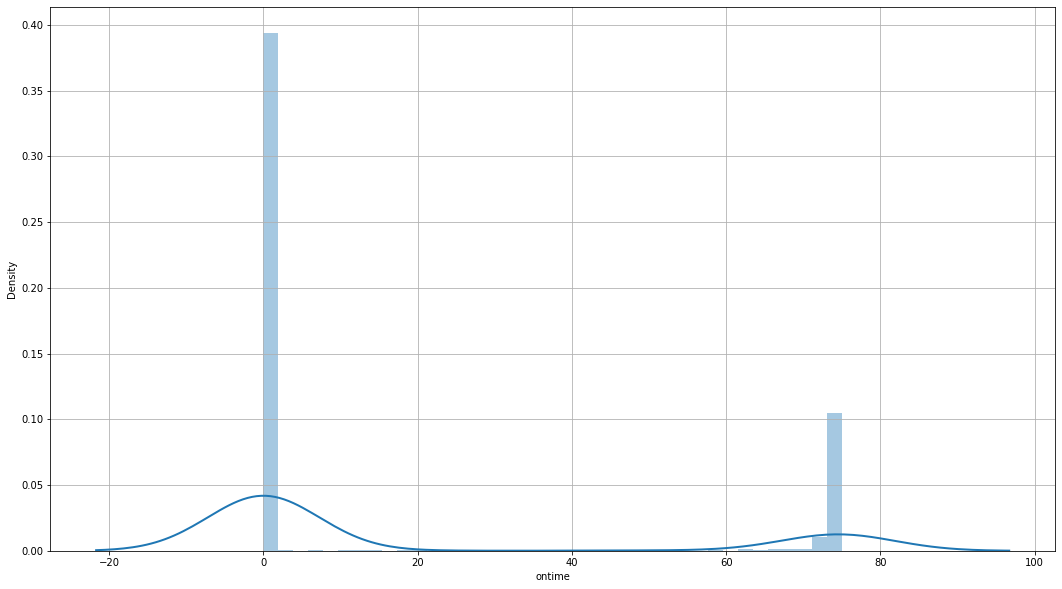

In [431]:
sns.distplot(Attendance['ontime'])
plt.show()

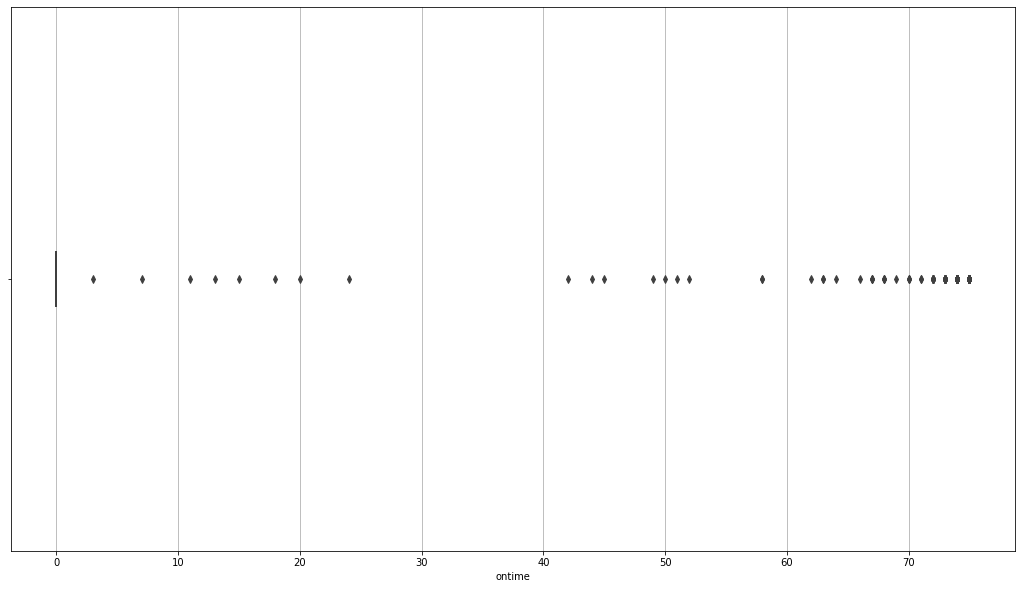

In [436]:
sns.boxplot(x=Attendance['ontime'],width=0.1)
plt.show()

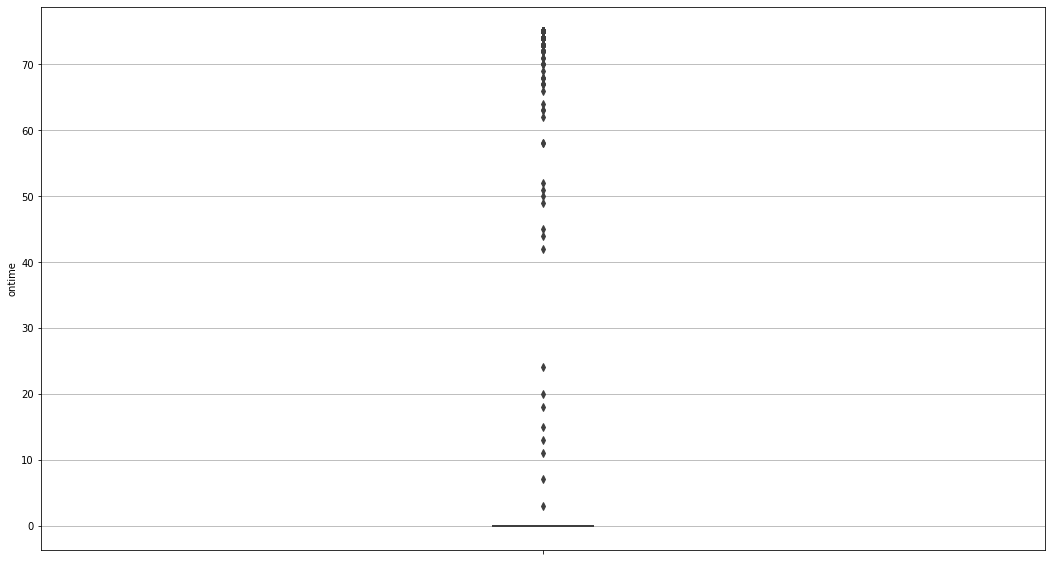

In [437]:
sns.boxplot(y=Attendance['ontime'],width=0.1)
plt.show()

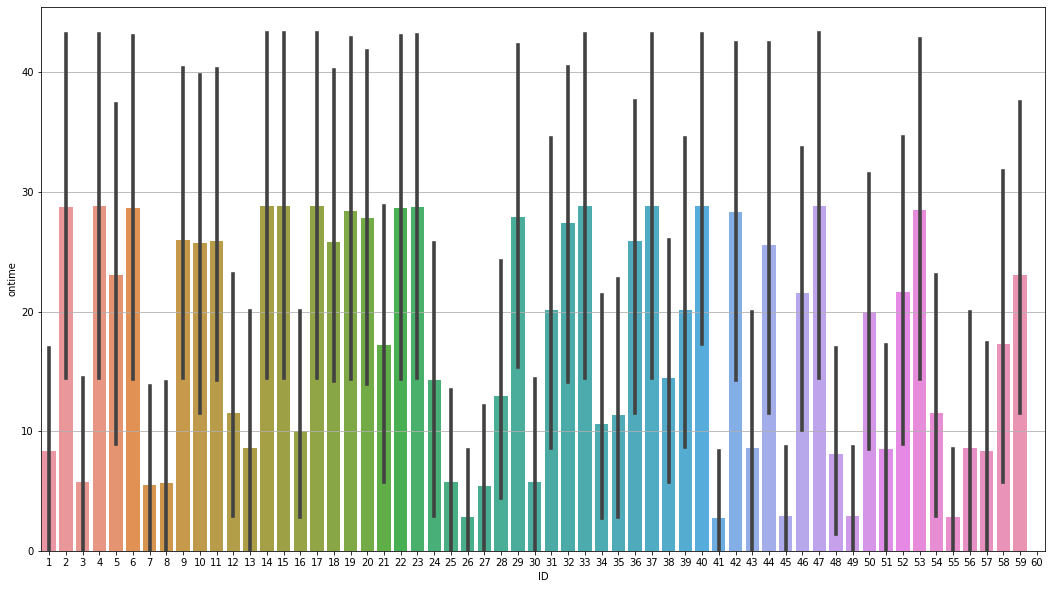

In [438]:
sns.barplot(x='ID',y='ontime',data=Attendance)
plt.show()

In [441]:
Attendance[['ID','date','ontime',]].corr()

,ID,ontime
ID,1.000000,-0.067684
ontime,-0.067684,1.000000
